In [1]:
#importing all the dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report

C:\Users\Durgesh Babu\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#importing data and storing into dataframe
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
#Checking if there are any null values in dataframe at all
df.isnull().sum().sum()

0

In [4]:
print(df.describe())

             Height        Weight
count  10000.000000  10000.000000
mean      66.367560    161.440357
std        3.847528     32.108439
min       54.263133     64.700127
25%       63.505620    135.818051
50%       66.318070    161.212928
75%       69.174262    187.169525
max       78.998742    269.989699


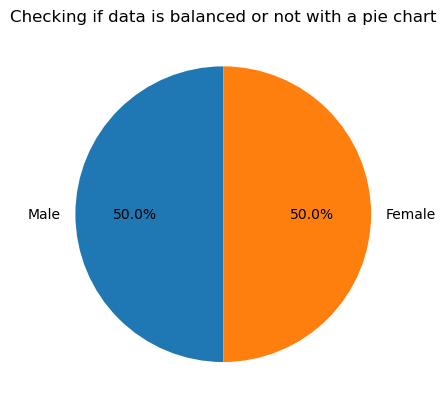

In [5]:
#Checking if data is balanced or not using pie chart for our target variable - gender
labels = df.Gender.unique()
sizes = [(df.Gender == labels[0]).sum(), (df.Gender == labels[1]).sum()]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle = 90)
plt.title("Checking if data is balanced or not with a pie chart")
plt.show()

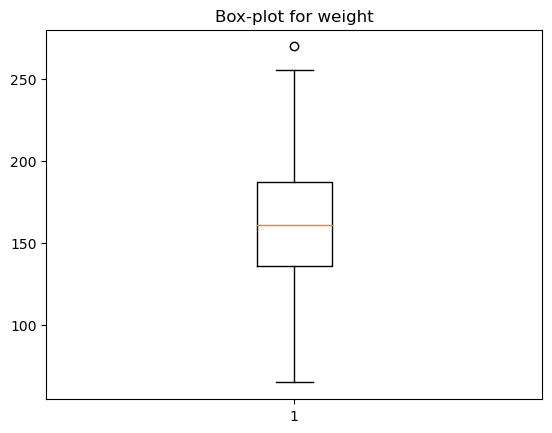

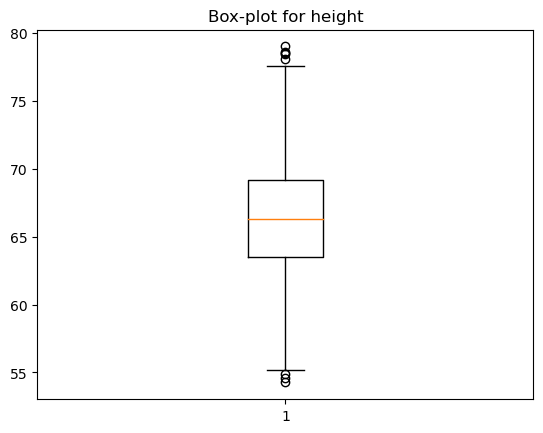

In [6]:
#Outliers
plt.boxplot(df.Weight)
plt.title('Box-plot for weight')
plt.show()

plt.boxplot(df.Height)
plt.title('Box-plot for height')
plt.show()

In [7]:
#finding relationship between gender and height
print(df.groupby('Gender')['Height'].describe())

         count       mean       std        min        25%        50%  \
Gender                                                                 
Female  5000.0  63.708774  2.696284  54.263133  61.894441  63.730924   
Male    5000.0  69.026346  2.863362  58.406905  67.174679  69.027709   

              75%        max  
Gender                        
Female  65.563565  73.389586  
Male    70.988744  78.998742  


In [8]:
#finding relationship between gender and weight
print(df.groupby('Gender')['Weight'].describe())

         count        mean        std         min         25%         50%  \
Gender                                                                      
Female  5000.0  135.860093  19.022468   64.700127  122.934096  136.117583   
Male    5000.0  187.020621  19.781155  112.902939  173.887767  187.033546   

               75%         max  
Gender                          
Female  148.810926  202.237214  
Male    200.357802  269.989699  


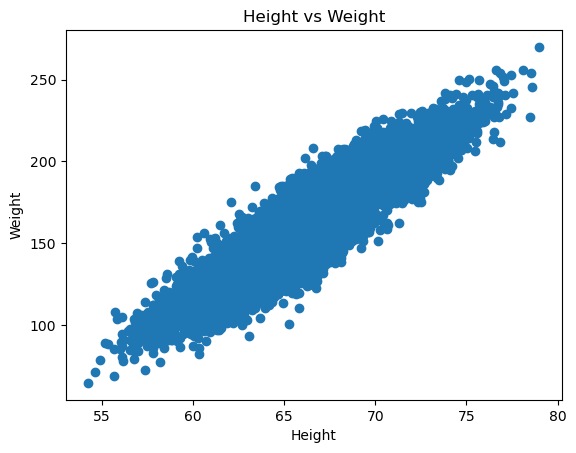

In [9]:
#scatter plot to analyse height vs weight
weight = df['Weight']
height = df['Height']
plt.scatter(height, weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title("Height vs Weight")
plt.show()

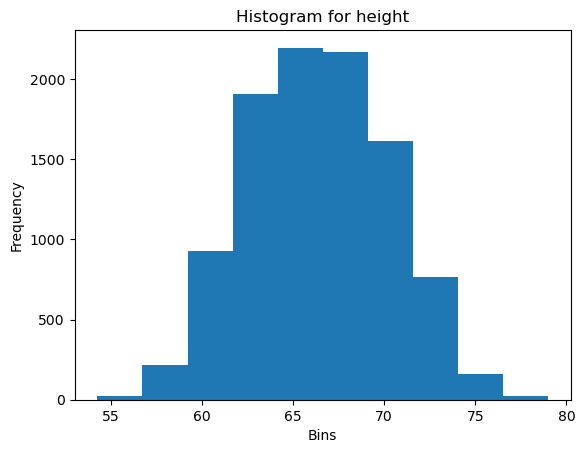

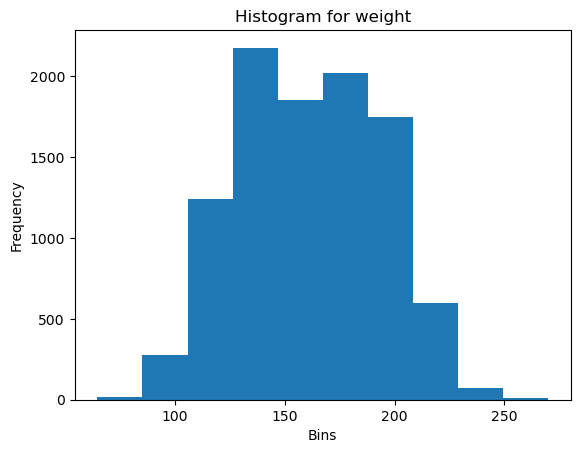

In [10]:
#histogram for height
plt.hist(height, bins = 10)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram for height')
plt.show()

#histogram for weight
plt.hist(weight, bins = 10)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram for weight')
plt.show()

In [11]:
#model to split data
train, test = train_test_split(df, test_size=0.2)
print("Test data set")
print(test.head())
print()
print("Train data set")
print(train.head())
print('')
print("No. of data in test:" +str(len(test)))
print("No. of data in train:" +str(len(train)))

print(train.groupby('Gender').count())
#creating x and y variables
feature_names = ['Height', 'Weight']
x_train = train[feature_names].values.tolist()
y_train = train['Gender']
x_test = test[feature_names].values.tolist()
y_test = test['Gender']

Test data set
      Gender     Height      Weight
3015    Male  72.445213  209.323421
404     Male  65.814943  166.583611
4782    Male  70.654439  184.383603
3155    Male  68.930729  186.781004
7605  Female  59.443040  117.174651

Train data set
      Gender     Height      Weight
8550  Female  60.483946  110.565497
1545    Male  63.183641  148.618674
5948  Female  64.246672  145.028015
4996    Male  68.973423  159.285228
7615  Female  65.072666  145.668534

No. of data in test:2000
No. of data in train:8000
        Height  Weight
Gender                
Female    3980    3980
Male      4020    4020


In [12]:
#defining classifiers
clf1 = tree.DecisionTreeClassifier()
clf2 = svm.SVC(gamma='auto')
clf3 = neighbors.KNeighborsClassifier()
clf4 = GaussianNB()

#fitting data
clf1 = clf1.fit(x_train,y_train)
clf2 = clf2.fit(x_train,y_train)
clf3 = clf3.fit(x_train, y_train)
clf4 = clf4.fit(x_train, y_train)

#making predictions
prediction1 = clf1.predict(x_test)
prediction2 = clf2.predict(x_test)
prediction3 = clf3.predict(x_test)
prediction4 = clf4.predict(x_test)

# Evaluating Model:

1. Classification Accuracy

In [13]:
#checking accuracy
r1 = accuracy_score(y_test, prediction1)
r2 = accuracy_score(y_test, prediction2)
r3 = accuracy_score(y_test, prediction3)
r4 = accuracy_score(y_test, prediction4)

print("Accuracy score of Model 1: DecisionTreeClassifier is "+str(r1))
print("Accuracy score of Model 2: SupportVectorMachine is "+str(r2))
print("Accuracy score of Model 3: KNN is "+str(r3))
print("Accuracy score of Model 4: GaussianNB is "+str(r4))

Accuracy score of Model 1: DecisionTreeClassifier is 0.877
Accuracy score of Model 2: SupportVectorMachine is 0.92
Accuracy score of Model 3: KNN is 0.92
Accuracy score of Model 4: GaussianNB is 0.8955


2. Misclassification Rate

In [14]:
#finding misclassification rate
mr1 = (1-metrics.accuracy_score(y_test, prediction1))
mr2 = (1-metrics.accuracy_score(y_test, prediction2))
mr3 = (1-metrics.accuracy_score(y_test, prediction3))
mr4 = (1-metrics.accuracy_score(y_test, prediction4))
print("Misclassification Rate of Decision Tree: "+ str(mr1))
print("Misclassification Rate of SVM: "+ str(mr2))
print("Misclassification Rate of KNN: "+ str(mr3))
print("Misclassification Rate of Naive Bayes: "+ str(mr4))

Misclassification Rate of Decision Tree: 0.123
Misclassification Rate of SVM: 0.07999999999999996
Misclassification Rate of KNN: 0.07999999999999996
Misclassification Rate of Naive Bayes: 0.10450000000000004


3. Sensitivity and Specificity

In [15]:
#confusion matrix

#decision tree
cm1 = confusion_matrix(y_test, prediction1)
TP1 = cm1[1,1]
TN1 = cm1[0,0]
FP1 = cm1[0,1]
FN1 = cm1[1,0]

#svm
cm2 = confusion_matrix(y_test, prediction2)
TP2 = cm2[1,1]
TN2 = cm2[0,0]
FP2 = cm2[0,1]
FN2 = cm2[1,0]

#knn
cm3 = confusion_matrix(y_test, prediction3)
TP3 = cm3[1,1]
TN3 = cm3[0,0]
FP3 = cm3[0,1]
FN3 = cm3[1,0]

#naive-bayes
cm4 = confusion_matrix(y_test, prediction4)
TP4 = cm4[1,1]
TN4 = cm4[0,0]
FP4 = cm4[0,1]
FN4 = cm4[1,0]

#sensitivity
sen1 = TP1 / float(FN1 + TP1)
sen2 = TP2 / float(FN2 + TP2)
sen3 = TP3 / float(FN3 + TP3)
sen4 = TP4 / float(FN4 + TP4)

#specificity
spec1 = TN1 / (TN1 + FP1)
spec2 = TN2 / (TN2 + FP2)
spec3 = TN3 / (TN3 + FP3)
spec4 = TN4 / (TN4 + FP4)

#printing
print("Sensitivity Rate of Decision Tree: "+ str(sen1))
print("Sensitivity Rate of SVM: "+ str(sen2))
print("Sensitivity Rate of KNN: "+ str(sen3))
print("Sensitivity Rate of Naive Bayes: "+ str(sen4))
print()
print("Specificity Rate of Decision Tree: "+ str(spec1))
print("Specificity Rate of SVM: "+ str(spec2))
print("Specificity Rate of KNN: "+ str(spec3))
print("Specificity Rate of Naive Bayes: "+ str(spec4))
print()
print("Classification Report: Decision Tree")
print(classification_report(y_test, prediction1))
print("Classification Report: SVM")
print(classification_report(y_test, prediction2))
print("Classification Report: KNN")
print(classification_report(y_test, prediction3))
print("Classification Report: Naive-Bayes")
print(classification_report(y_test, prediction4))

Sensitivity Rate of Decision Tree: 0.8704081632653061
Sensitivity Rate of SVM: 0.926530612244898
Sensitivity Rate of KNN: 0.9224489795918367
Sensitivity Rate of Naive Bayes: 0.8948979591836734

Specificity Rate of Decision Tree: 0.8833333333333333
Specificity Rate of SVM: 0.9137254901960784
Specificity Rate of KNN: 0.9176470588235294
Specificity Rate of Naive Bayes: 0.8960784313725491

Classification Report: Decision Tree
              precision    recall  f1-score   support

      Female       0.88      0.88      0.88      1020
        Male       0.88      0.87      0.87       980

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000

Classification Report: SVM
              precision    recall  f1-score   support

      Female       0.93      0.91      0.92      1020
        Male       0.91      0.93      0.92       980

    accuracy                           0.92      2000
  

In [16]:
#Making a prediction for a user
height = 71
weight = 176
prediction = clf2.predict([[height, weight]])
print("The classifier predicts that you could be " +str(prediction[0]))

The classifier predicts that you could be Male
